In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimpleStew/'

In [3]:
final_df=pd.read_csv('SimpleStew_MS_PerStep.csv')

In [4]:
filtered_pourbroth = final_df[final_df['Step'].str.strip() == 'Pour Broth']
filtered_pourbroth
#C029 is not included

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
8,C001,36,Pour Broth,812.608216,899.941076,891.861802,928.598749,1035.573134,1784.495819,0.000000,0.000000
18,C003,58,Pour Broth,2416.319672,1549.437498,4811.979810,2256.734721,2130.161392,2685.000315,3558.918685,1652.556965
28,C006,42,Pour Broth,292.258129,442.117670,478.237162,381.813594,585.134376,754.859616,519.044154,447.152372
38,C008,34,Pour Broth,559.441615,527.436941,837.240495,771.943406,895.050565,973.826839,924.394622,817.754168
47,C009,24,Pour Broth,2137.194232,1588.586316,2359.839116,1937.072180,2705.981105,2923.157215,2442.208647,1935.139796
57,C012,54,Pour Broth,315.072198,230.934174,354.365370,328.456425,361.834158,596.616266,502.160235,429.612033
65,C013,48,Pour Broth,409.458086,448.240233,617.592776,654.561793,620.873495,750.523459,586.061400,515.786550
75,C016,39,Pour Broth,338.203302,249.061733,368.896023,365.448502,319.961403,518.009513,426.375796,395.608540
85,C017,36,Pour Broth,881.600939,1227.435473,1280.485380,1074.349904,1172.399652,1609.534276,1972.819190,1142.676652
95,C020,30,Pour Broth,602.727035,1439.972193,1137.772789,962.371731,1104.466442,1414.660442,1095.627786,909.828670


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_pourbroth = filtered_pourbroth.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_pourbroth.select_dtypes(include=['float64', 'int64']).columns
filtered_pourbroth[numerical_cols] = filtered_pourbroth[numerical_cols].replace(0, np.nan)

filtered_pourbroth[numerical_cols] = imputer.fit_transform(filtered_pourbroth[numerical_cols])
filtered_pourbroth

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
8,C001,36.0,Pour Broth,812.608216,899.941076,891.861802,928.598749,1035.573134,1784.495819,1972.819190,1142.676652
18,C003,58.0,Pour Broth,2416.319672,1549.437498,4811.979810,2256.734721,2130.161392,2685.000315,3558.918685,1652.556965
28,C006,42.0,Pour Broth,292.258129,442.117670,478.237162,381.813594,585.134376,754.859616,519.044154,447.152372
38,C008,34.0,Pour Broth,559.441615,527.436941,837.240495,771.943406,895.050565,973.826839,924.394622,817.754168
47,C009,24.0,Pour Broth,2137.194232,1588.586316,2359.839116,1937.072180,2705.981105,2923.157215,2442.208647,1935.139796
57,C012,54.0,Pour Broth,315.072198,230.934174,354.365370,328.456425,361.834158,596.616266,502.160235,429.612033
65,C013,48.0,Pour Broth,409.458086,448.240233,617.592776,654.561793,620.873495,750.523459,586.061400,515.786550
75,C016,39.0,Pour Broth,338.203302,249.061733,368.896023,365.448502,319.961403,518.009513,426.375796,395.608540
85,C017,36.0,Pour Broth,881.600939,1227.435473,1280.485380,1074.349904,1172.399652,1609.534276,1972.819190,1142.676652
95,C020,30.0,Pour Broth,602.727035,1439.972193,1137.772789,962.371731,1104.466442,1414.660442,1095.627786,909.828670


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Pour Broth',
    'HeadCamera Distance': 'HeadCamera Distance - Pour Broth',
    'LeftElbow Distance': 'LeftElbow Distance - Pour Broth',
    'LeftShoulder Distance': 'LeftShoulder Distance - Pour Broth',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Pour Broth',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Pour Broth',
    'RightElbow Distance': 'RightElbow Distance - Pour Broth',
    'RightShoulder Distance': 'RightShoulder Distance - Pour Broth'
}

# Rename columns
filtered_pourbroth = filtered_pourbroth.rename(columns=new_column_names)
filtered_pourbroth

,Participant,Block Design Raw Score,Step,Chest Distance - Pour Broth,HeadCamera Distance - Pour Broth,LeftElbow Distance - Pour Broth,LeftShoulder Distance - Pour Broth,MotionControllerLeft Distance - Pour Broth,MotionControllerRight Distance - Pour Broth,RightElbow Distance - Pour Broth,RightShoulder Distance - Pour Broth
8,C001,36.0,Pour Broth,812.608216,899.941076,891.861802,928.598749,1035.573134,1784.495819,1972.819190,1142.676652
18,C003,58.0,Pour Broth,2416.319672,1549.437498,4811.979810,2256.734721,2130.161392,2685.000315,3558.918685,1652.556965
28,C006,42.0,Pour Broth,292.258129,442.117670,478.237162,381.813594,585.134376,754.859616,519.044154,447.152372
38,C008,34.0,Pour Broth,559.441615,527.436941,837.240495,771.943406,895.050565,973.826839,924.394622,817.754168
47,C009,24.0,Pour Broth,2137.194232,1588.586316,2359.839116,1937.072180,2705.981105,2923.157215,2442.208647,1935.139796
57,C012,54.0,Pour Broth,315.072198,230.934174,354.365370,328.456425,361.834158,596.616266,502.160235,429.612033
65,C013,48.0,Pour Broth,409.458086,448.240233,617.592776,654.561793,620.873495,750.523459,586.061400,515.786550
75,C016,39.0,Pour Broth,338.203302,249.061733,368.896023,365.448502,319.961403,518.009513,426.375796,395.608540
85,C017,36.0,Pour Broth,881.600939,1227.435473,1280.485380,1074.349904,1172.399652,1609.534276,1972.819190,1142.676652
95,C020,30.0,Pour Broth,602.727035,1439.972193,1137.772789,962.371731,1104.466442,1414.660442,1095.627786,909.828670


In [7]:
tracker_columns = ['Chest Distance - Pour Broth', 'HeadCamera Distance - Pour Broth', 'LeftElbow Distance - Pour Broth', 'LeftShoulder Distance - Pour Broth',
                   'RightElbow Distance - Pour Broth', 'RightShoulder Distance - Pour Broth', 'MotionControllerLeft Distance - Pour Broth',
                   'MotionControllerRight Distance - Pour Broth']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_pourbroth, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_pourbroth[block_design_col], filtered_pourbroth[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_pourbroth, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Pour Broth,-0.482976,0.068203
1,HeadCamera Distance - Pour Broth,-0.479858,0.070266
2,LeftElbow Distance - Pour Broth,-0.546108,0.035196
3,LeftShoulder Distance - Pour Broth,-0.533574,0.040515
4,RightElbow Distance - Pour Broth,-0.399642,0.139983
5,RightShoulder Distance - Pour Broth,-0.528675,0.042749
6,MotionControllerLeft Distance - Pour Broth,-0.483440,0.067899
7,MotionControllerRight Distance - Pour Broth,-0.474487,0.073926


In [8]:
#filtered_pourbroth.to_csv('SimpleStew_PourBroth.csv',index=False)

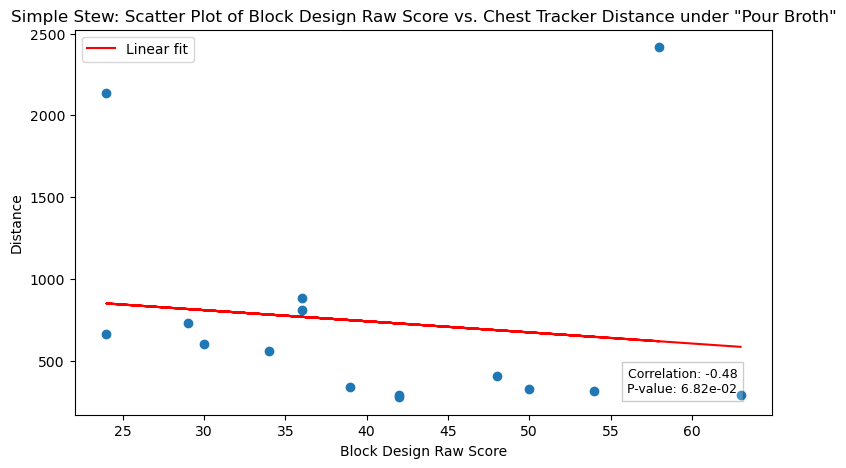

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

chest_df = filtered_pourbroth
correlation, p_value = spearmanr(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Pour Broth'], 1)
fit_line = slope * chest_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(chest_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '9 SS_PourbrothChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

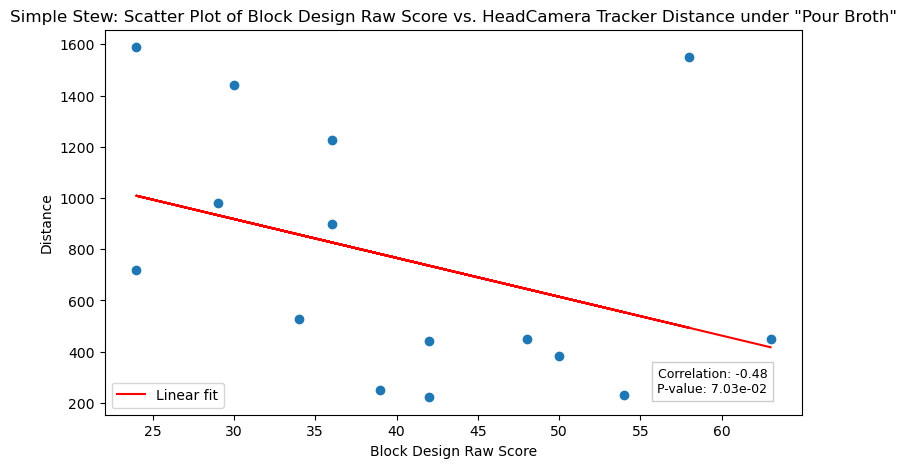

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['HeadCamera Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['HeadCamera Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['HeadCamera Distance - Pour Broth'], 1)
fit_line = slope * filtered_pourbroth['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_pourbroth['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '10 SS_PourbrothHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

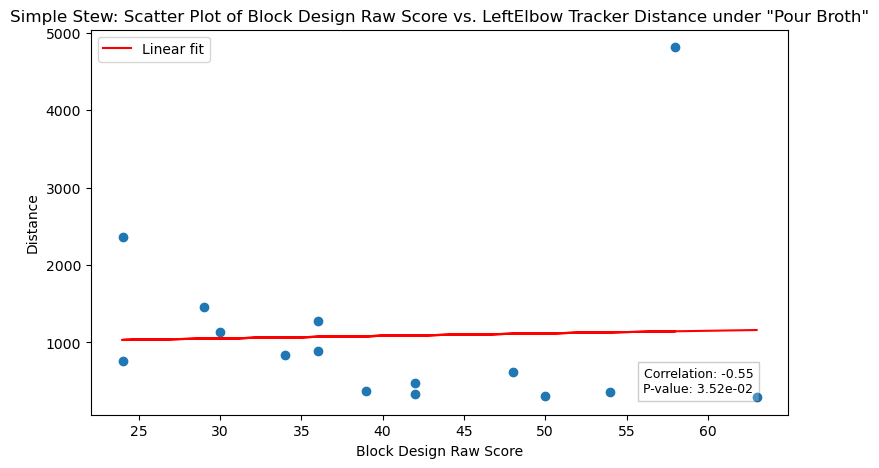

In [13]:
filtered_broth = filtered_pourbroth
correlation, p_value = spearmanr(filtered_broth['Block Design Raw Score'], filtered_broth['LeftElbow Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_broth['Block Design Raw Score'], filtered_broth['LeftElbow Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_broth['Block Design Raw Score'], filtered_broth['LeftElbow Distance - Pour Broth'], 1)
fit_line = slope * filtered_broth['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_broth['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '11 SS_PourbrothLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

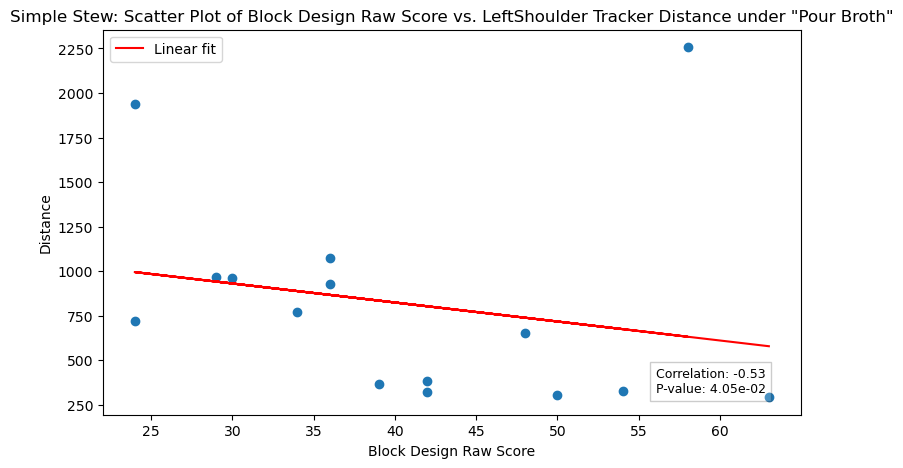

In [15]:
filtered_broth = filtered_pourbroth
correlation, p_value = spearmanr(filtered_broth['Block Design Raw Score'], filtered_broth['LeftShoulder Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_broth['Block Design Raw Score'], filtered_broth['LeftShoulder Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_broth['Block Design Raw Score'], filtered_broth['LeftShoulder Distance - Pour Broth'], 1)
fit_line = slope * filtered_broth['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_broth['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '12 SS_PourbrothLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

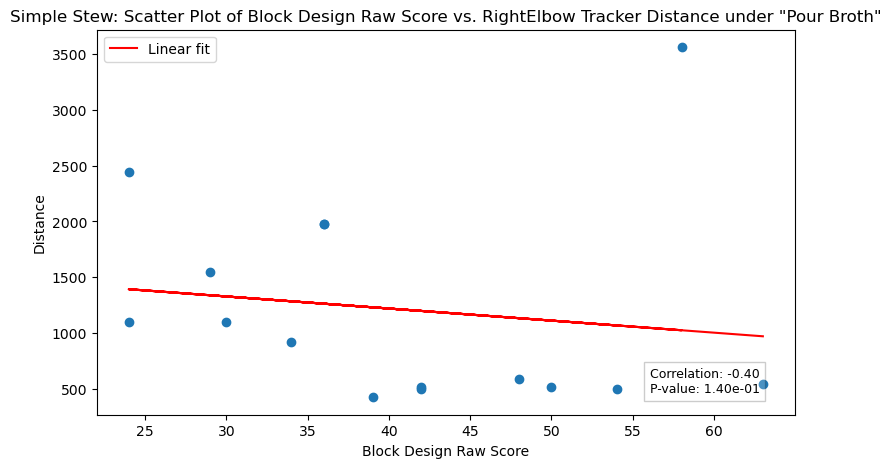

In [16]:
rightelbow_df = filtered_pourbroth
correlation, p_value = spearmanr(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow Distance - Pour Broth'], 1)
fit_line = slope * rightelbow_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(rightelbow_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '13 SS_PourbrothRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

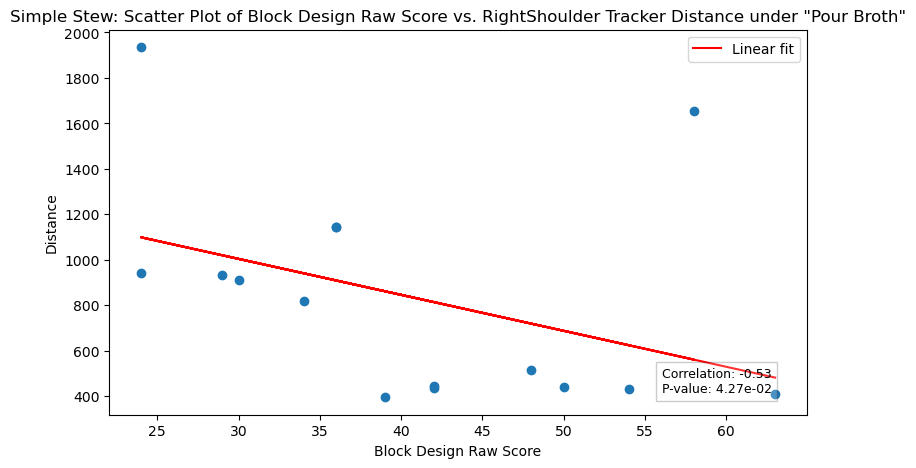

In [17]:
rightshoulder_df = filtered_pourbroth
correlation, p_value = spearmanr(rightshoulder_df['Block Design Raw Score'], rightshoulder_df['RightShoulder Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(rightshoulder_df['Block Design Raw Score'], rightshoulder_df['RightShoulder Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(rightshoulder_df['Block Design Raw Score'], rightshoulder_df['RightShoulder Distance - Pour Broth'], 1)
fit_line = slope * rightshoulder_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(rightshoulder_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '14 SS_PourbrothRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

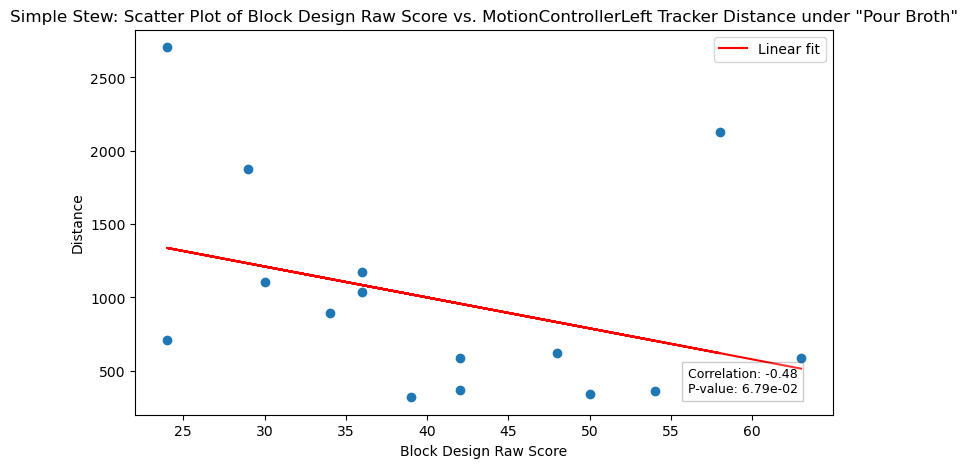

In [18]:
filtered_broth = filtered_pourbroth
correlation, p_value = spearmanr(filtered_broth['Block Design Raw Score'], filtered_broth['MotionControllerLeft Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_broth['Block Design Raw Score'], filtered_broth['MotionControllerLeft Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_broth['Block Design Raw Score'], filtered_broth['MotionControllerLeft Distance - Pour Broth'], 1)
fit_line = slope * filtered_broth['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_broth['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. MotionControllerLeft Tracker Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '15 SS_PourbrothLeftController.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

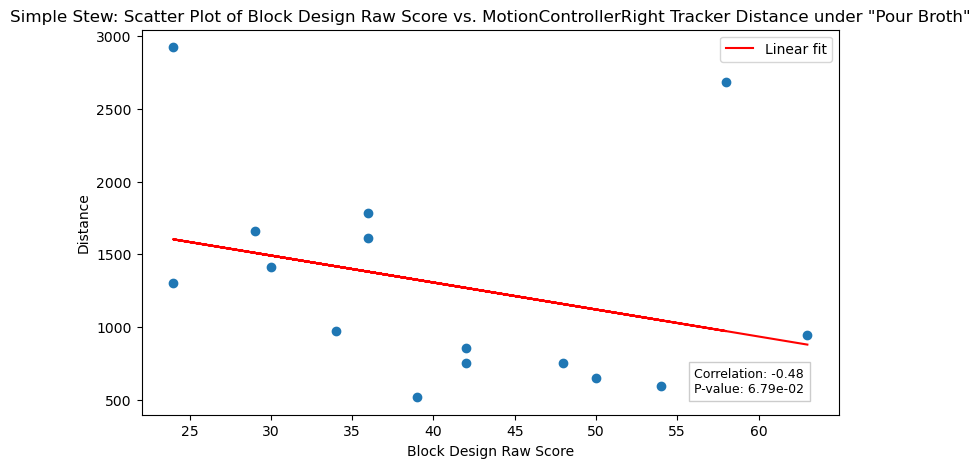

In [19]:
filtered_broth = filtered_pourbroth
correlation, p_value = spearmanr(filtered_broth['Block Design Raw Score'], filtered_broth['MotionControllerLeft Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_broth['Block Design Raw Score'], filtered_broth['MotionControllerRight Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_broth['Block Design Raw Score'], filtered_broth['MotionControllerRight Distance - Pour Broth'], 1)
fit_line = slope * filtered_broth['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_broth['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. MotionControllerRight Tracker Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '16 SS_PourbrothRightController.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()